正在读取文件: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv
数据读取成功，共 1733661 行

=== 统计信息 ===
总事件数: 1,733,661
动量大小范围: [0.086, 5541.384] GeV/c
动量大小均值: 114.469 ± 256.692 GeV/c
角度范围: [0.0, 180.0] 度
角度均值: 90.0 ± 74.5 度
前向粒子 (θ < 90°): 866,883 (50.0%)
后向粒子 (θ > 90°): 866,778 (50.0%)

二维图像已保存至: /media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution.png


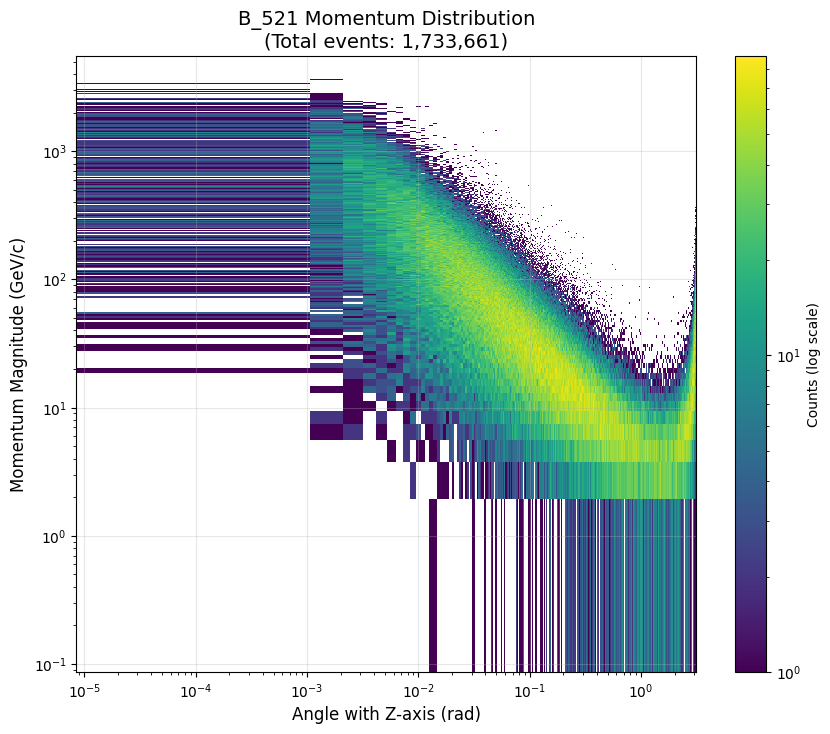

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

def calculate_momentum_properties(df):
    """
    计算动量大小和与z轴的夹角
    """
    # 提取动量分量
    px = df['px_521'].values
    py = df['py_521'].values
    pz = df['pz_521'].values
    
    # 计算动量大小
    p_magnitude = np.sqrt(px**2 + py**2 + pz**2)
    
    # 计算与z轴的夹角（弧度）
    # 使用点积公式: cos(theta) = (p·z)/(|p|*|z|) = pz/|p|
    cos_theta = pz / p_magnitude
    
    # 处理数值误差，确保cos_theta在[-1, 1]范围内
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # 计算角度（弧度）
    theta_rad = np.arccos(cos_theta)
    
    # 转换为角度
    theta_deg = np.degrees(theta_rad)
    
    return p_magnitude, theta_deg, theta_rad

def plot_momentum_distribution_2d(df, output_path=None, bins=100):
    """
    绘制动量分布二维图
    
    参数:
    df: 包含动量数据的DataFrame
    output_path: 输出图像路径（可选）
    bins: 直方图分箱数
    """
    # 计算动量大小和角度
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    # 创建图形
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 二维直方图（颜色表示数量）
    ax1 = axes[0, 0]
    h = ax1.hist2d(theta_deg, p_magnitude, bins=bins, cmap='viridis', norm=LogNorm())
    ax1.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('2D Momentum Distribution (Log Scale)', fontsize=14)
    plt.colorbar(h[3], ax=ax1, label='Counts')
    
    # 2. 二维散点图（带颜色映射）
    ax2 = axes[0, 1]
    sc = ax2.scatter(theta_deg, p_magnitude, c=p_magnitude, 
                     s=1, alpha=0.5, cmap='plasma')
    ax2.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax2.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax2.set_title('Momentum Scatter Plot', fontsize=14)
    plt.colorbar(sc, ax=ax2, label='Momentum (GeV/c)')
    
    # 3. 密度图
    ax3 = axes[1, 0]
    h2 = ax3.hist2d(theta_deg, p_magnitude, bins=bins, cmap='hot', norm=LogNorm())
    ax3.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax3.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax3.set_title('Density Plot (Log Scale)', fontsize=14)
    plt.colorbar(h2[3], ax=ax3, label='Counts')
    
    # 4. 极坐标投影的二维直方图
    ax4 = axes[1, 1]
    # 将角度转换为弧度用于极坐标
    h3 = ax4.hist2d(theta_rad, p_magnitude, bins=bins, cmap='coolwarm', norm=LogNorm())
    ax4.set_xlabel('Angle with Z-axis (radians)', fontsize=12)
    ax4.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax4.set_title('Distribution in Radians', fontsize=14)
    plt.colorbar(h3[3], ax=ax4, label='Counts')
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_path}")
    
    plt.show()
    
    return fig

def plot_enhanced_2d_distribution(df, output_path=None, bins=150):
    """
    绘制增强版的二维分布图（单个大图）
    """
    # 计算动量大小和角度
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    # 创建图形
    fig = plt.figure(figsize=(16, 12))
    
    # 1. 主图：二维直方图（对数颜色尺度）
    ax1 = plt.subplot(221)
    h1 = ax1.hist2d(theta_deg, p_magnitude, bins=bins, cmap='viridis', norm=LogNorm())
    ax1.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('Momentum Distribution (Log Color Scale)', fontsize=14)
    plt.colorbar(h1[3], ax=ax1, label='Counts (log scale)')
    
    # 添加统计信息
    stats_text = f'Total events: {len(df):,}\n'
    stats_text += f'Mean momentum: {np.mean(p_magnitude):.3f} GeV/c\n'
    stats_text += f'Mean angle: {np.mean(theta_deg):.1f}°'
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. 边缘分布：角度分布
    ax2 = plt.subplot(222)
    ax2.hist(theta_deg, bins=bins//2, alpha=0.7, color='blue', edgecolor='black')
    ax2.set_xlabel('Angle with Z-axis (degrees)', fontsize=12)
    ax2.set_ylabel('Counts', fontsize=12)
    ax2.set_title('Angular Distribution', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # 3. 边缘分布：动量大小分布
    ax3 = plt.subplot(223)
    ax3.hist(p_magnitude, bins=bins//2, alpha=0.7, color='red', edgecolor='black')
    ax3.set_xlabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax3.set_ylabel('Counts', fontsize=12)
    ax3.set_title('Momentum Magnitude Distribution', fontsize=14)
    ax3.grid(True, alpha=0.3)
    
    # 4. 相关性热图（使用hexbin）
    ax4 = plt.subplot(224)
    hb = ax4.hexbin(theta_rad, p_magnitude, gridsize=50, cmap='YlOrRd', mincnt=1)
    ax4.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax4.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax4.set_yscale('log')
    ax4.set_title('Hexbin Distribution', fontsize=14)
    plt.colorbar(hb, ax=ax4, label='Counts')
    
    plt.suptitle(f'B_521 Momentum Analysis (Total events: {len(df):,})', fontsize=16, y=1.02)
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"增强版图像已保存至: {output_path}")
    
    plt.show()
    
    return fig

def analyze_momentum_data(file_path, plot_type='enhanced'):
    """
    分析动量数据的主函数
    
    参数:
    file_path: B_521.csv文件路径
    plot_type: 绘图类型 ('basic' 或 'enhanced')
    """
    # 读取数据
    print(f"正在读取文件: {file_path}")
    df = pd.read_csv(file_path)
    print(f"数据读取成功，共 {len(df)} 行")
    
    # 检查必要的列是否存在
    required_columns = ['px_521', 'py_521', 'pz_521']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        raise ValueError(f"缺少必要的列: {missing_columns}")
    
    # 计算统计信息
    p_magnitude, theta_deg, theta_rad = calculate_momentum_properties(df)
    
    print("\n=== 统计信息 ===")
    print(f"总事件数: {len(df):,}")
    print(f"动量大小范围: [{np.min(p_magnitude):.3f}, {np.max(p_magnitude):.3f}] GeV/c")
    print(f"动量大小均值: {np.mean(p_magnitude):.3f} ± {np.std(p_magnitude):.3f} GeV/c")
    print(f"角度范围: [{np.min(theta_deg):.1f}, {np.max(theta_deg):.1f}] 度")
    print(f"角度均值: {np.mean(theta_deg):.1f} ± {np.std(theta_deg):.1f} 度")
    print(f"前向粒子 (θ < 90°): {np.sum(theta_deg < 90):,} ({np.sum(theta_deg < 90)/len(df)*100:.1f}%)")
    print(f"后向粒子 (θ > 90°): {np.sum(theta_deg > 90):,} ({np.sum(theta_deg > 90)/len(df)*100:.1f}%)")
    
    # 绘制图像
    if plot_type == 'basic':
        fig = plot_momentum_distribution_2d(df, bins=100)
    elif plot_type == 'enhanced':
        fig = plot_enhanced_2d_distribution(df, bins=150)
    elif plot_type == 'no':
        fig = None
    else:
        raise ValueError(f"未知的绘图类型: {plot_type}")
    
    return df, p_magnitude, theta_deg, fig, theta_rad

# 主程序
# if __name__ == "__main__":
#     # 设置文件路径
#     file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv"  # 请替换为实际路径
    
#     # 设置输出图像路径（可选）
#     output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution.png"  # 可选
    
#     try:
#         # 分析数据并绘制图像
#         df, p_magnitude, theta_deg, fig, theta_rad = analyze_momentum_data(file_path, plot_type='no')
        
#         # 如果需要保存单个二维图
#         if output_image_path:
#             # 创建一个专门的二维图
#             plt.figure(figsize=(10, 8))
#             h = plt.hist2d(theta_rad, p_magnitude, bins=3000, cmap='viridis', norm=LogNorm())
#             plt.xlabel('Angle with Z-axis (rad)', fontsize=12)
#             plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
#             plt.yscale('log')
#             plt.xscale('log')
#             plt.title(f'B_521 Momentum Distribution\n(Total events: {len(df):,})', fontsize=14)
#             plt.colorbar(h[3], label='Counts (log scale)')
#             plt.grid(True, alpha=0.3)
#             plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
#             print(f"\n二维图像已保存至: {output_image_path}")
#             plt.show()
        
#     except FileNotFoundError:
#         print(f"错误: 找不到文件 {file_path}")
#     except Exception as e:
#         print(f"错误: {e}")
#         import traceback
#         traceback.print_exc()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

def calculate_momentum_properties(df):
    """
    计算动量大小和与z轴的夹角
    """
    # 提取动量分量
    px = df['px_521'].values
    py = df['py_521'].values
    pz = df['pz_521'].values
    
    # 计算动量大小
    p_magnitude = np.sqrt(px**2 + py**2 + pz**2)
    
    # 计算与z轴的夹角（弧度）
    # 使用点积公式: cos(theta) = (p·z)/(|p|*|z|) = pz/|p|
    cos_theta = pz / p_magnitude
    
    # 处理数值误差，确保cos_theta在[-1, 1]范围内
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # 计算角度（弧度）
    theta_rad = np.arccos(cos_theta)
    
    # 避免0角度（log坐标需要正值）
    theta_rad = np.maximum(theta_rad, 1e-10)
    
    return p_magnitude, theta_rad

def create_log_bins(data_min, data_max, n_bins, log_offset=1e-10):
    """
    创建对数分箱
    
    参数:
    data_min: 数据最小值
    data_max: 数据最大值
    n_bins: 分箱数量
    log_offset: 对数偏移（避免log(0)）
    
    返回:
    bins: 对数分箱边界
    """
    # 确保最小值大于0（对数需要正值）
    data_min_log = np.log10(max(data_min, log_offset))
    data_max_log = np.log10(data_max)
    
    # 在对数空间创建等间距分箱
    log_bins = np.logspace(data_min_log, data_max_log, n_bins + 1)
    
    return log_bins

def plot_log_log_hist2d(theta_rad, p_magnitude, output_path=None, n_bins_x=100, n_bins_y=100):
    """
    绘制对数-对数坐标的2D直方图，使用对数分箱
    """
    # 过滤无效数据（确保为正数）
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 创建对数分箱
    # X轴（角度）：对数分箱
    x_min, x_max = theta_rad_valid.min(), theta_rad_valid.max()
    x_bins = create_log_bins(x_min, x_max, n_bins_x)
    
    # Y轴（动量）：对数分箱
    y_min, y_max = p_magnitude_valid.min(), p_magnitude_valid.max()
    y_bins = create_log_bins(y_min, y_max, n_bins_y)
    
    # 创建图形
    plt.figure(figsize=(12, 9))
    
    # 绘制2D直方图，使用对数分箱
    h = plt.hist2d(theta_rad_valid, p_magnitude_valid, 
                   bins=[x_bins, y_bins], 
                   cmap='viridis', 
                   norm=LogNorm())
    
    # 设置坐标轴
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Angle with Z-axis (rad)', fontsize=14)
    plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=14)
    plt.title(f'B_521 Momentum Distribution (Log-Log Scale)\nTotal events: {len(theta_rad_valid):,}', fontsize=16)
    
    # 颜色条
    cbar = plt.colorbar(h[3])
    cbar.set_label('Counts per log-log bin', fontsize=12)
    
    # 添加网格
    plt.grid(True, which='both', alpha=0.3, linestyle='--')
    
    # 添加统计信息文本框
    stats_text = (f'Events: {len(theta_rad_valid):,}\n'
                  f'θ range: [{x_min:.2e}, {x_max:.2f}] rad\n'
                  f'p range: [{y_min:.2e}, {y_max:.2f}] GeV/c\n'
                  f'Bins: {n_bins_x}×{n_bins_y} (log spacing)')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_path}")
    
    plt.show()
    
    return h

def plot_adaptive_log_hist2d(theta_rad, p_magnitude, output_path=None):
    """
    自适应对数分箱的2D直方图
    """
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 根据数据范围自动确定分箱数量
    n_bins_x = min(200, int(50 * np.log10(theta_rad_valid.max() / max(theta_rad_valid.min(), 1e-10))))
    n_bins_y = min(200, int(50 * np.log10(p_magnitude_valid.max() / p_magnitude_valid.min())))
    
    n_bins_x = max(50, n_bins_x)
    n_bins_y = max(50, n_bins_y)
    
    print(f"使用自适应分箱: {n_bins_x}×{n_bins_y}")
    
    return plot_log_log_hist2d(theta_rad, p_magnitude, output_path, n_bins_x, n_bins_y)

def plot_density_log_log(theta_rad, p_magnitude, output_path=None):
    """
    使用hexbin绘制对数-对数坐标的密度图（更适合稀疏数据）
    """
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    plt.figure(figsize=(12, 9))
    
    # 使用hexbin（六边形分箱），适合对数坐标
    hb = plt.hexbin(theta_rad_valid, p_magnitude_valid,
                    xscale='log', yscale='log',
                    gridsize=100,  # 六边形网格大小
                    mincnt=1,      # 最小计数
                    cmap='viridis',
                    bins='log')    # 对数颜色尺度
    
    plt.xlabel('Angle with Z-axis (rad)', fontsize=14)
    plt.ylabel('Momentum Magnitude (GeV/c)', fontsize=14)
    plt.title(f'B_521 Momentum Distribution (Hexbin Log-Log)\nTotal events: {len(theta_rad_valid):,}', fontsize=16)
    
    cbar = plt.colorbar(hb)
    cbar.set_label('Counts per hexbin', fontsize=12)
    
    plt.grid(True, which='both', alpha=0.3, linestyle='--')
    
    if output_path:
        plt.savefig(output_path.replace('.png', '_hexbin.png'), dpi=300, bbox_inches='tight')
        print(f"Hexbin图像已保存至: {output_path.replace('.png', '_hexbin.png')}")
    
    plt.show()

def plot_comparison(theta_rad, p_magnitude, output_path=None):
    """
    绘制对比图：线性分箱 vs 对数分箱
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. 原始方法（线性分箱，对数坐标）
    ax1 = axes[0]
    h1 = ax1.hist2d(theta_rad, p_magnitude, bins=3000, cmap='viridis', norm=LogNorm())
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax1.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax1.set_title('Linear Binning (shows distortion)', fontsize=14)
    ax1.grid(True, alpha=0.3)
    plt.colorbar(h1[3], ax=ax1, label='Counts')
    
    # 2. 改进方法（对数分箱）
    ax2 = axes[1]
    
    # 过滤数据
    valid_idx = (theta_rad > 0) & (p_magnitude > 0)
    theta_rad_valid = theta_rad[valid_idx]
    p_magnitude_valid = p_magnitude[valid_idx]
    
    # 创建对数分箱
    x_bins = np.logspace(np.log10(theta_rad_valid.min()), 
                         np.log10(theta_rad_valid.max()), 200)
    y_bins = np.logspace(np.log10(p_magnitude_valid.min()), 
                         np.log10(p_magnitude_valid.max()), 200)
    
    h2 = ax2.hist2d(theta_rad_valid, p_magnitude_valid, 
                    bins=[x_bins, y_bins], 
                    cmap='viridis', norm=LogNorm())
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('Angle with Z-axis (rad)', fontsize=12)
    ax2.set_ylabel('Momentum Magnitude (GeV/c)', fontsize=12)
    ax2.set_title('Logarithmic Binning (correct distribution)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    plt.colorbar(h2[3], ax=ax2, label='Counts')
    
    plt.suptitle(f'B_521 Momentum Distribution Comparison\nTotal events: {len(theta_rad):,}', fontsize=16)
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path.replace('.png', '_comparison.png'), dpi=300, bbox_inches='tight')
        print(f"对比图像已保存至: {output_path.replace('.png', '_comparison.png')}")
    
    plt.show()

def main():
    """
    主函数
    """
    # 设置文件路径
    file_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Files/LLP_DATA/Decay_B2025-12-03_2HDM_B_test/B_521.csv"  # 请替换为实际路径

    # 设置输出图像路径（可选）
    output_image_path = "/media/ubuntu/6156e08b-fdb1-4cde-964e-431f74a6078e/Program/PRA/Github/position_read_analyse_1.3/ALL_IN_ONE/Momentum_Analyse/B_521_momentum_distribution.png"  # 可选
    
    try:
        # 读取数据
        print(f"正在读取文件: {file_path}")
        df = pd.read_csv(file_path)
        print(f"数据读取成功，共 {len(df)} 行")
        
        # 检查必要的列
        required_columns = ['px_521', 'py_521', 'pz_521']
        missing_columns = [col for col in required_columns if col not in df.columns]
        
        if missing_columns:
            raise ValueError(f"缺少必要的列: {missing_columns}")
        
        # 计算动量属性
        p_magnitude, theta_rad = calculate_momentum_properties(df)
        
        print("\n=== 数据统计 ===")
        print(f"总事件数: {len(df):,}")
        print(f"有效事件数(θ>0, p>0): {np.sum((theta_rad > 0) & (p_magnitude > 0)):,}")
        print(f"角度范围: [{theta_rad.min():.2e}, {theta_rad.max():.2f}] rad")
        print(f"动量范围: [{p_magnitude.min():.2e}, {p_magnitude.max():.2f}] GeV/c")
        
        # 绘制不同类型的图像
        print("\n=== 绘制图像 ===")
        
        # 1. 对数分箱的2D直方图（推荐）
        print("绘制对数分箱2D直方图...")
        plot_log_log_hist2d(theta_rad, p_magnitude, output_image_path, n_bins_x=150, n_bins_y=150)
        
        # 2. 自适应分箱
        print("\n绘制自适应分箱图像...")
        plot_adaptive_log_hist2d(theta_rad, p_magnitude, 
                                output_image_path.replace('.png', '_adaptive.png'))
        
        # 3. Hexbin密度图（适合稀疏数据）
        print("\n绘制Hexbin密度图...")
        plot_density_log_log(theta_rad, p_magnitude, output_image_path)
        
        # # 4. 对比图
        # print("\n绘制对比图...")
        # plot_comparison(theta_rad, p_magnitude, output_image_path)
        
        print("\n所有图像绘制完成!")
        
    except Exception as e:
        print(f"错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()